# Problem statement: 

Build a classifier to detect fraudulent transactions using creditcard-fraud.csv dataset. It contains columns Time, V1-V28 and Amount. Class is the outcome variable. Use Amount and V1-V28 columns as p

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

In [3]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


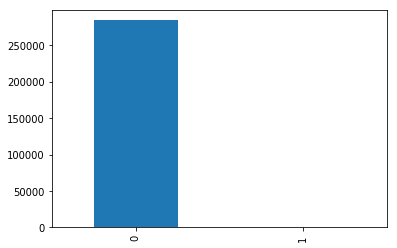

In [5]:
df.Class.value_counts().plot.bar()

In [6]:
df.Class.value_counts() / len(df.default)

AttributeError: 'DataFrame' object has no attribute 'default'

In [6]:
target = "default"
y = np.where(df.default == 2, 1, 0)
X = df.copy()
del X[target]

X_dummy = pd.get_dummies(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)



Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [18]:
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
months_loan_duration                     1000 non-null int64
amount                                   1000 non-null int64
installment_rate                         1000 non-null int64
residence_history                        1000 non-null int64
age                                      1000 non-null int64
existing_credits                         1000 non-null int64
dependents                               1000 non-null int64
checking_balance_1 - 200 DM              1000 non-null uint8
checking_balance_< 0 DM                  1000 non-null uint8
checking_balance_> 200 DM                1000 non-null uint8
checking_balance_unknown                 1000 non-null uint8
credit_history_critical                  1000 non-null uint8
credit_history_delayed                   1000 non-null uint8
credit_history_fully repaid              1000 non-null uint8
credit_history_fully repaid this bank   

In [7]:
y_test_pred = pipe.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.7

In [8]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a0abf2ba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0ac36f60>)

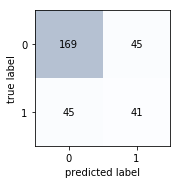

In [9]:
 plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [16]:
pd.DataFrame(pipe.predict_proba(X_test), columns=["P(y=0)", "P(y=1)"]).head()

,P(y=0),P(y=1)
0,0.994141,0.005859
1,0.000013,0.999987
2,0.364044,0.635956
3,0.004376,0.995624
4,0.903513,0.096487


(<matplotlib.figure.Figure at 0x1a0ac59a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0ac52cf8>)

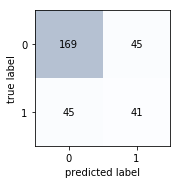

In [10]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>=0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x1a0acd3a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0ac596a0>)

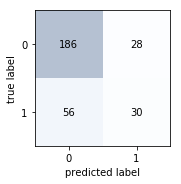

In [11]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x1a0ad24fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a11933898>)

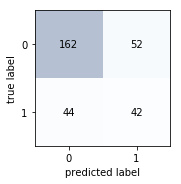

In [12]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))